In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

# Prepare Data

In [2]:
data = []
with open('data') as file:
    for line in file:
        p = line.replace('\n', '').split(' ')
        data.append([float(q) for q in p])

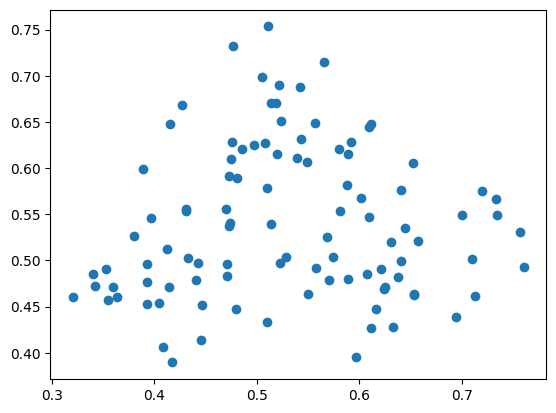

In [3]:
plt.scatter([d[0] for d in data], [d[1] for d in data])
plt.show()

# Question 1

a) Implement Lloyds Algorithm

In [4]:
def distance(p_i, p_j):
    return (p_i[0] - p_j[0])**2 + (p_i[1] - p_j[1])**2
# def distance(x_1, x_2):
    # d = 0
    # for i in [0,1]:
    #     d += ( x_1[i] - x_2[i] )**2
    # return d

def lloyd(K: int):
    N = len(data)

    # initialize cluster centers
    u = [ data[randint(0, N - 1)] for k in range(K) ]
    prev_u = [[0,0] for k in range(K)]

    # repeat until convergence
    while True:
        # assign every point to nearest cluster
        S = [[] for k in range(K)]
        for i in range(N):
            distances = [distance(data[i],u[k]) for k in range(K)]
            nearest_K = np.argmin(distances)
            S[nearest_K].append(i)
        
        # get mean for each cluster
        prev_u = u.copy()
        for k in range(K):
            k_size = len(S[k])
            k_sum_x = np.sum([ data[i][0] for i in S[k] ])
            k_sum_y = np.sum([ data[i][1] for i in S[k] ])
            u[k] = [ k_sum_x/k_size, k_sum_y/k_size ]
        
        # check convergence
        max_difference = np.max([ distance(u[k], prev_u[k]) for k in range(K) ])
        if max_difference < 0.000001:
            return S

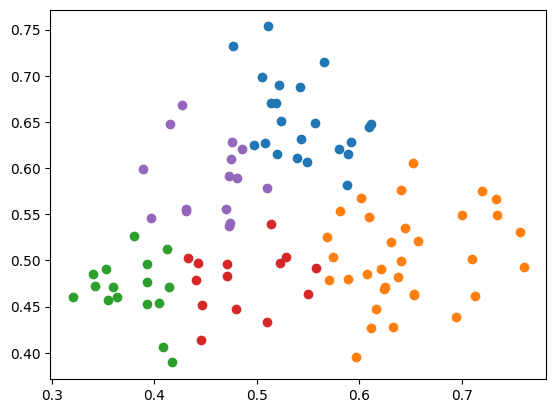

In [5]:
S = lloyd(5)

for k in range(len(S)):
    plt.scatter([ data[i][0] for i in S[k] ], [ data[i][1] for i in S[k] ])
plt.show()